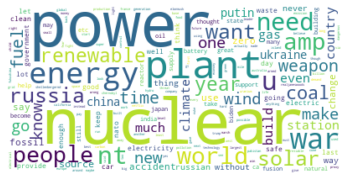

In [113]:
#individueel Ayrton
import json
import pandas as pd
import string
import tweepy as tp
import twitter_credentials as tc
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

client = tp.Client(tc.bearer_token)

#getting the data and saving it into a json file
# Create the jsonfile
jsonFile = open('ayrton.json', 'a')

# Lists to save the tweets in to write to a json file
twts = []

"""
# search tweets about nuclear power, last 30 days till now -30 seconds,
for response in tp.Paginator(client.search_recent_tweets, query="nuclear power -is:retweet lang:en",
                             tweet_fields=['created_at', 'source', 'text'],
                             ).flatten(500):
    twts.append(response.data)

    # save the list in a json file
json.dump(twts, jsonFile, indent=6)
jsonFile.close()
"""
#the tweets from json file to memory
tweetFile = pd.read_json("ayrton.json")
#the text from the tweet to memory
tweetsText = tweetFile.text

#list where the tokenized words are stored
wordsList = []
#tokenize the tweets and making them strings
for tweets in tweetsText:
    wordsList += nltk.word_tokenize(str(tweets).lower())

#method to remove punctuation, check if the word contains special character
def verwijder_interpunctie(tekst):
    tekst = "".join([char for char in tekst
    if char not in string.punctuation])
    return tekst

#transforming the list to a panda dataframe to apply the verwijder_interpunctie method.
wordsList = pd.DataFrame(wordsList)
wordsList.columns = ['text']
wordsList['text'] = wordsList['text'].apply(lambda x: verwijder_interpunctie(x))

#list with english stop words
Stopwords= stopwords.words('english')
wordsListWithoutStopword = []
#creating a list where the stopwords have been left out
for word in wordsList['text']:
    if word not in Stopwords:
        wordsListWithoutStopword.append(word)

lema = WordNetLemmatizer()
wordsListLemmetazation= []
#applying lemmetazation and creating a new list.
for word in wordsListWithoutStopword:
    wordsListLemmetazation.append(lema.lemmatize(word))

pd.set_option("display.max_rows", None, "display.max_columns", None)

# get data output
dfTweets = wordsListLemmetazation

# get all text from tweets
text = " ".join(dfTweets)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()